In [17]:
# Machine Learning for the project
# Oran Howard 18672266
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
import warnings
from sklearn.svm import SVC

# read in the file
fifa_results_final = pd.read_csv('Final_data/fifa_results_final_elo.csv')
fifa_results_final = fifa_results_final.drop(fifa_results_final.columns[[0]], axis=1) 
# sort the values by ID so they are in order of first date to last
fifa_results_final.sort_values(by=['ID'], inplace=True)
fifa_results_final

,ID,Game_ID,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,total_away_goals,total_home_shot,total_away_shot,game_week_home,game_week_away_x,game_week_away_y,avg_home_goals,avg_away_goals,avg_home_ST,avg_away_AT
0,1,0,E0,2014-08-16,Arsenal,Crystal Palace,2,1,H,1,...,0.0,0.0,0.0,1,1,1,0.000000,0.000000,0.000000,0.000000
1,2,1,E0,2014-08-16,Leicester,Everton,2,2,D,1,...,0.0,0.0,0.0,1,1,1,0.000000,0.000000,0.000000,0.000000
2,3,2,E0,2014-08-16,Man United,Swansea,1,2,A,0,...,0.0,0.0,0.0,1,1,1,0.000000,0.000000,0.000000,0.000000
3,4,3,E0,2014-08-16,QPR,Hull,0,1,A,0,...,0.0,0.0,0.0,1,1,1,0.000000,0.000000,0.000000,0.000000
4,5,4,E0,2014-08-16,Stoke,Aston Villa,0,1,A,0,...,0.0,0.0,0.0,1,1,1,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,2276,375,E0,2020-07-26,Leicester,Man United,0,2,A,0,...,24.0,85.0,95.0,19,1,19,1.944444,1.333333,4.722222,5.277778
2276,2277,376,E0,2020-07-26,Man City,Norwich,5,0,H,2,...,7.0,125.0,54.0,19,1,19,2.888889,0.388889,6.944444,3.000000
2277,2278,377,E0,2020-07-26,Newcastle,Liverpool,1,3,A,1,...,30.0,75.0,96.0,19,1,19,1.055556,1.666667,4.166667,5.333333
2278,2279,378,E0,2020-07-26,Southampton,Sheffield United,3,1,H,0,...,14.0,73.0,42.0,19,1,19,1.000000,0.777778,4.055556,2.333333


In [18]:
# data that will be used for classification
# Final combinations of data we used to test our models

real_data_combination_1 = fifa_results_final [['FTR','HomeTeam','AwayTeam','HomeTeamELO',
                                               'AwayTeamELO','Difference_Elo',
                                               'avg_home_goals','avg_away_goals',
                                              'B365H','B365D','B365A']]
                                          
real_data_combination_2 = fifa_results_final [['FTR','HomeTeam','AwayTeam','HomeTeamELO',
                                               'AwayTeamELO','Difference_Elo',
                                              'B365H','B365D','B365A','avg_home_goals',
                                               'avg_away_goals','avg_home_ST',
                                               'avg_away_AT','total_home_points',
                                               'total_away_points'
                                               ,'total_home_points','total_away_points']]
                                         

virtual_data_combination_1 = fifa_results_final [['FTR','HomeTeam','AwayTeam','HTR','ATR',
                                                  'HTP','HTW','HTV','ATP','ATW','ATV',
                                                  ' HGKR','HDefR','HMidR',
                                             'HAttR','AGKR','ADefR','AMidR','AAttR',
                                                  'Difference_Rating','Differnce_Val',
                                                  'Differnce_Wage']]
    
    
virtual_data_combination_2 = fifa_results_final [['FTR','HomeTeam','AwayTeam','HTR','ATR',
                                                  'HTP','HTW','HTV','ATP','ATW','ATV',
                                                  ' HGKR','HDefR','HMidR',
                                             'HAttR','AGKR','ADefR','AMidR','AAttR']]


mixed_data_combination_1 = fifa_results_final[['FTR','HomeTeam','AwayTeam','HTR','ATR',
                                               'HTP','HTW','HTV','ATP','ATW','ATV',
                                               ' HGKR','HDefR','HMidR',
                                              'HAttR','AGKR','ADefR','AMidR',
                                               'AAttR','HomeTeamELO','AwayTeamELO',
                                               'B365H','B365D','B365A']]

mixed_data_combination_2 = fifa_results_final[['FTR','HomeTeam','AwayTeam','HTR','ATR',
                                               'HTP','HTW','HTV','ATP','ATW','ATV',
                                               ' HGKR','HDefR','HMidR',
                                              'HAttR','AGKR','ADefR','AMidR',
                                               'AAttR','B365H','B365D','B365A',
                                               'avg_home_goals','avg_away_goals',
                                               'avg_home_ST','avg_away_AT','total_home_points',
                                               'total_away_points'
                                               ,'total_home_points','total_away_points',
                                              'HomeTeamELO','AwayTeamELO']]

odds_benchmark = fifa_results_final[['FTR','HomeTeam','AwayTeam','B365H','B365D','B365A']]


virtual_data_combination_2

,FTR,HomeTeam,AwayTeam,HTR,ATR,HTP,HTW,HTV,ATP,ATW,ATV,HGKR,HDefR,HMidR,HAttR,AGKR,ADefR,AMidR,AAttR
0,H,Arsenal,Crystal Palace,79.347826,72.173913,82.000000,101521.73910,1.045652e+07,74.565217,26739.13043,2.166304e+06,78.500000,78.166667,79.833333,80.333333,73.5,71.714286,72.500000,71.500000
1,D,Leicester,Everton,69.391304,76.782609,72.608696,16043.47826,1.227391e+06,79.478261,49565.21739,5.538043e+06,65.666667,69.500000,70.250000,70.250000,76.0,75.428571,77.444444,77.800000
2,A,Man United,Swansea,78.304348,72.782609,82.347826,110608.69570,1.317196e+07,75.826087,31739.13043,3.290217e+06,80.000000,75.571429,77.272727,87.333333,74.0,71.222222,74.000000,73.400000
3,A,QPR,Hull,74.217391,72.347826,76.608696,36739.13043,3.221739e+06,74.869565,30434.78261,2.581304e+06,75.000000,75.000000,73.846154,74.000000,71.0,72.285714,72.900000,71.750000
4,A,Stoke,Aston Villa,74.347826,73.478261,75.826087,41086.95652,3.898913e+06,76.347826,35434.78261,3.201087e+06,76.500000,73.375000,74.000000,76.666667,76.0,72.555556,73.142857,74.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,A,Leicester,Man United,76.478261,79.739130,80.695652,60869.56522,1.048696e+07,83.652174,106826.08700,2.004348e+07,78.000000,75.555556,77.666667,76.166667,84.5,79.111111,79.750000,78.750000
2276,H,Man City,Norwich,83.652174,73.043478,87.086957,167391.30430,3.647826e+07,76.391304,32173.91304,4.956522e+06,82.500000,82.250000,83.571429,86.000000,76.5,71.625000,72.909091,76.000000
2277,A,Newcastle,Liverpool,75.869565,81.347826,79.000000,33478.26087,8.869565e+06,84.782609,109173.91300,2.962500e+07,76.500000,75.909091,74.166667,78.000000,82.5,80.500000,82.000000,81.333333
2278,H,Southampton,Sheffield United,75.086957,71.956522,79.260870,40521.73913,8.203261e+06,74.739130,22391.30435,3.963043e+06,75.000000,75.285714,75.100000,74.666667,71.0,71.300000,72.666667,72.800000


In [19]:
#  classification dataset 
def split_encode(classification_data):
    
    labelencoder = LabelEncoder()

    HomeTeam = labelencoder.fit_transform(classification_data['HomeTeam'])
    AwayTeam = labelencoder.fit_transform(classification_data['AwayTeam'])
    
    classification_data['HomeTeam'] = HomeTeam
    classification_data['AwayTeam'] = AwayTeam

    df_val_classification = classification_data.values
    #assigns all the columns except the first column to the variable X
    X_classification = df_val_classification[:,1:40]
    #assigns only the first column as variable Y
    Y_classification = df_val_classification[:,0]
    # converts home win, away win, and draw to label of 0,1,2
    # 0 = Away Win 1 = Draw 2 = Home win
    Y_label = labelencoder.fit_transform(Y_classification)

    X_train_classification, X_test_classification, Y_train_classification, Y_test_classification = train_test_split(X_classification, Y_label, test_size=0.1665,shuffle=False,random_state=0)

    df_X_test_classification = pd.DataFrame(X_test_classification)
    
    return X_train_classification, X_test_classification, Y_train_classification, Y_test_classification,X_classification,Y_classification

# call the split_encode function on all the different data combinations
mixed_data_combination_1 = split_encode(mixed_data_combination_1) 
X_train_mixed_data_1 = mixed_data_combination_1[0]
X_test_mixed_data_1 = mixed_data_combination_1[1]
Y_train_mixed_data_1 = mixed_data_combination_1[2]
Y_test_mixed_data_1 = mixed_data_combination_1[3]
X_mixed_data_1 = mixed_data_combination_1[4]
Y_mixed_data_1 = mixed_data_combination_1[5]


mixed_data_combination_2 = split_encode(mixed_data_combination_2) 
X_train_mixed_data_2 = mixed_data_combination_2[0]
X_test_mixed_data_2 = mixed_data_combination_2[1]
Y_train_mixed_data_2 = mixed_data_combination_2[2]
Y_test_mixed_data_2 = mixed_data_combination_2[3]
X_mixed_data_2 = mixed_data_combination_2[4]
Y_mixed_data_2 = mixed_data_combination_2[5]

real_data_combination_1 = split_encode(real_data_combination_1) 
X_train_real_data_1 = real_data_combination_1[0]
X_test_real_data_1 = real_data_combination_1[1]
Y_train_real_data_1 = real_data_combination_1[2]
Y_test_real_data_1 = real_data_combination_1[3]
X_real_data_1 = real_data_combination_1[4]
Y_real_data_1 = real_data_combination_1[5]

real_data_combination_2 = split_encode(real_data_combination_2) 
X_train_real_data_2 = real_data_combination_2[0]
X_test_real_data_2 = real_data_combination_2[1]
Y_train_real_data_2 = real_data_combination_2[2]
Y_test_real_data_2 = real_data_combination_2[3]
X_real_data_2 = real_data_combination_2[4]
Y_real_data_2 = real_data_combination_2[5]

virtual_data_combination_1 = split_encode(virtual_data_combination_1) 
X_train_virtual_data_1 = virtual_data_combination_1[0]
X_test_virtual_data_1 = virtual_data_combination_1[1]
Y_train_virtual_data_1 = virtual_data_combination_1[2]
Y_test_virtual_data_1 = virtual_data_combination_1[3]
X_virtual_data_1 = virtual_data_combination_1[4]
Y_virtual_data_1 = virtual_data_combination_1[5]

virtual_data_combination_2 = split_encode(virtual_data_combination_2) 
X_train_virtual_data_2 = virtual_data_combination_2[0]
X_test_virtual_data_2 = virtual_data_combination_2[1]
Y_train_virtual_data_2 = virtual_data_combination_2[2]
Y_test_virtual_data_2 = virtual_data_combination_2[3]
X_virtual_data_2 = virtual_data_combination_2[4]
Y_virtual_data_2 = virtual_data_combination_2[5]

# set target names
target_names = ['Away Win', 'Draw', 'Home Win']


In [20]:
# converts team names into numbers
def convert_teams(X_test,Y_test):

    df_X_test = pd.DataFrame(X_test)
    df_Y_test = pd.DataFrame(Y_test)

    # change team names to numeric values so we can encode and output them later
    home_team_train = df_X_test[0]
    home_team_num_list_class = home_team_train.tolist()

    away_team_train = df_X_test[1]
    away_team_num_list_class = away_team_train.tolist() 
    target_names = ['Away Win', 'Draw', 'Home Win']
    
    return home_team_num_list_class, away_team_num_list_class
        
converted_teams = convert_teams(X_test_virtual_data_2,Y_test_virtual_data_2)
home_team_num_list_class = converted_teams[0]
away_team_num_list_class = converted_teams[1]

In [21]:
# a label encoder for team names. Converts team names from numbers back to their name
def encode_teams(fifa_results_final,home_team_num_list,away_team_num_list):

    label_encoder = preprocessing.LabelEncoder()
    input_classes = fifa_results_final['HomeTeam'].unique()
    label_encoder.fit(input_classes)

    labels_home = fifa_results_final['HomeTeam'].unique()
    encoded_labels = label_encoder.transform(labels_home)
    home_team_name = label_encoder.inverse_transform(home_team_num_list)

    input_classes_away = fifa_results_final['AwayTeam'].unique()
    label_encoder.fit(input_classes_away)

    labels_away = fifa_results_final['AwayTeam'].unique()
    encoded_labels_away = label_encoder.transform(labels_away)
    away_team_name = label_encoder.inverse_transform(away_team_num_list)
    target_names = ['Away Win', 'Draw', 'Home Win']
        
    return home_team_name,away_team_name

class_encoded = encode_teams(fifa_results_final,home_team_num_list_class,away_team_num_list_class)   
home_team_name_class = class_encoded[0]
away_team_name_class = class_encoded[1]

Max Tree Accuacy Scores for all datasets:


Max Tree Accuacy Scores for virtual_data_1:
 0.5210526315789473

Max Tree Accuacy Scores for virtual_data_2:
 0.5184210526315789
Max Tree Accuacy Scores for mixed_data_1:
 0.5394736842105263

Max Tree Accuacy Scores for mixed_data_2:
 0.5368421052631579

Max Tree Accuacy Scores for real_data_1:
 0.5421052631578948

Max Tree Accuacy Scores for real_data_2:
 0.5368421052631579


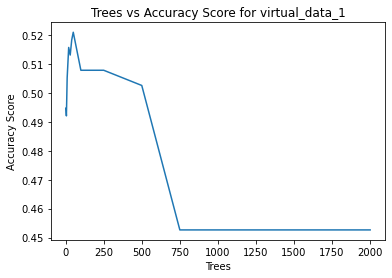

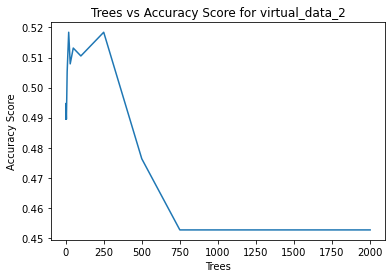

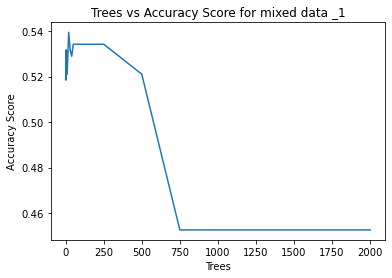

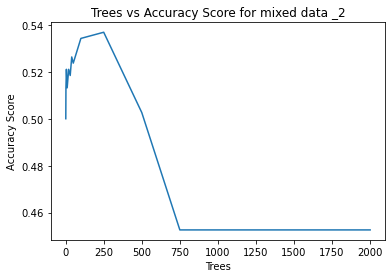

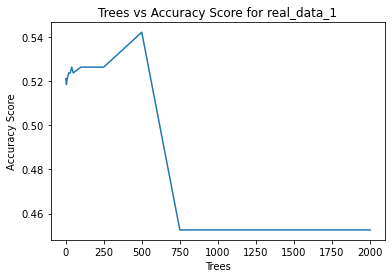

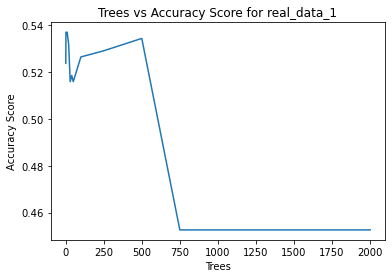

In [22]:
# classification - random forest 
# iterate through different number of trees to see what gives us the best accuracy
def random_forest(X_train, X_test, Y_train, Y_test, label):
    tree_accuracy_scores = []
    trees = [1, 2, 5, 10, 20, 30, 40, 50, 100, 250, 500, 750, 1000, 2000] 
    for i in trees: # For each value in list
        rfclf = RandomForestClassifier(n_estimators=1000,min_samples_leaf=i)
        rfclf.fit(X_train, Y_train)
        rfclf_predict = rfclf.predict(X_test)
        tree_accuracy=accuracy_score(Y_test, rfclf_predict) 
        tree_accuracy_scores.append(tree_accuracy)
        #print('Randon forest, with',i,'trees :\n \naccuracy =', accuracy_score(Y_test, rfclf_predict))
        #print('\n',classification_report(Y_test, rfclf_predict, target_names=target_names)) 
        predictions = rfclf.predict_proba(X_test)
        # convert to %
        predictions = predictions*100

    plt.figure()   
    plt.plot(trees, tree_accuracy_scores) 
    plt.ylabel('Accuracy Score') 
    plt.xlabel('Trees') 
    plt.title('Trees vs Accuracy Score' + str(label))
        
    return max(tree_accuracy_scores)

# call the random forest function with each set of data 
print('Max Tree Accuacy Scores for all datasets:\n')

tree_scores = []

random_forest_virtual_data_1 = random_forest(X_train_virtual_data_1,X_test_virtual_data_1,Y_train_virtual_data_1,Y_test_virtual_data_1,' for virtual_data_1')
random_forest_virtual_data_2 = random_forest(X_train_virtual_data_2,X_test_virtual_data_2,Y_train_virtual_data_2,Y_test_virtual_data_2,' for virtual_data_2')
print('\nMax Tree Accuacy Scores for virtual_data_1:\n',random_forest_virtual_data_1)
print('\nMax Tree Accuacy Scores for virtual_data_2:\n',random_forest_virtual_data_2)

tree_scores.append(random_forest_virtual_data_1)
tree_scores.append(random_forest_virtual_data_2)

random_forest_mixed_data_1 = random_forest(X_train_mixed_data_1,X_test_mixed_data_1,Y_train_mixed_data_1,Y_test_mixed_data_1,' for mixed data _1')
random_forest_mixed_data_2 = random_forest(X_train_mixed_data_2,X_test_mixed_data_2,Y_train_mixed_data_2,Y_test_mixed_data_2,' for mixed data _2')
print('Max Tree Accuacy Scores for mixed_data_1:\n',random_forest_mixed_data_1)
print('\nMax Tree Accuacy Scores for mixed_data_2:\n',random_forest_mixed_data_2)

tree_scores.append(random_forest_mixed_data_1)
tree_scores.append(random_forest_mixed_data_2)

random_forest_real_data_1 = random_forest(X_train_real_data_1,X_test_real_data_1,Y_train_real_data_1,Y_test_real_data_1,' for real_data_1')
random_forest_real_data_2 = random_forest(X_train_real_data_2,X_test_real_data_2,Y_train_real_data_2,Y_test_real_data_2,' for real_data_1')
print('\nMax Tree Accuacy Scores for real_data_1:\n',random_forest_real_data_1)
print('\nMax Tree Accuacy Scores for real_data_2:\n',random_forest_real_data_2)

tree_scores.append(random_forest_real_data_1)
tree_scores.append(random_forest_real_data_2)

ANN Max Accuacy Score for all datasets:


Max Tree Accuacy Scores for virtual_data_1:
 0.5210526315789473

Max Tree Accuacy Scores for virtual_data_2:
 0.5184210526315789
Max Tree Accuacy Scores for mixed_data_1:
 0.5210526315789473

Max Tree Accuacy Scores for mixed_data_2:
 0.5263157894736842

Max Tree Accuacy Scores for real_data_1:
 0.5421052631578948

Max Tree Accuacy Scores for real_data_2:
 0.5368421052631579


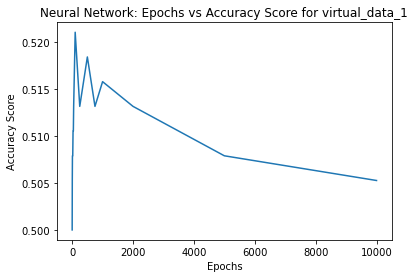

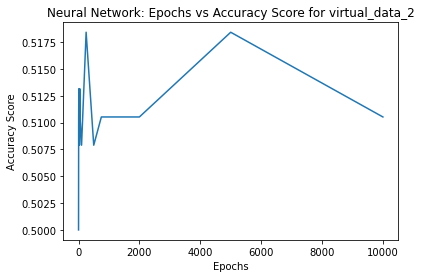

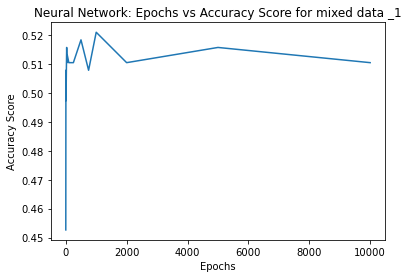

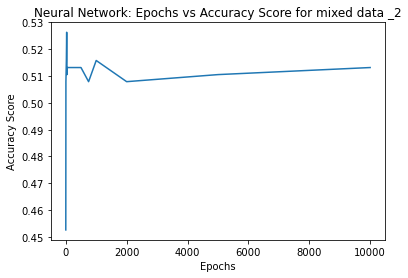

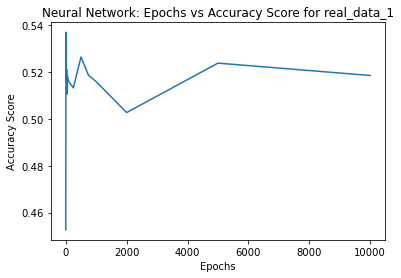

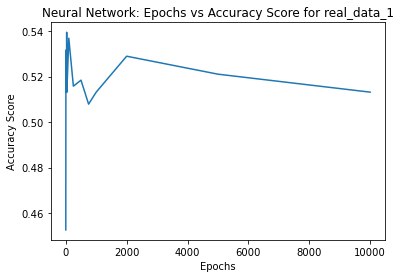

In [23]:
# classification - artificial neural network 

warnings.filterwarnings('ignore')
# artificial neural network (ANN)
# using the sklearn library to create an artificial neural network
# activation method as logistic use the sigmoid function as the non-linear activation function for the hidden layers 
# returns f(x) = 1 / (1 + exp(-x)) (scikit-learn, n.d.)
# Multi-layer Perceptron classifier = MLP
# max_iter value = number of epochs. 200 is default. 
# Fit the model to data matrix X and targets y.
# Predict using the multi-layer perceptron classifier 
# different numbers of epochs to monitor how accuracy changes as the
# algorithm keeps learning, which you can plot using the number of epochs in the ‘x’ axis
# and the accuracy in ‘y’ axis.
def ann_mlp(X_train, X_test, Y_train, Y_test, label):

    ann_accuracy_scores = []
    epochs = [1,5,10, 20, 30, 40, 50, 100, 250, 500, 750, 1000, 2000, 5000, 10000] 

    for i in epochs: # For each value in list
        mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'logistic', max_iter=i)
        mlp.fit(X_train, Y_train)
        Y_predictions = mlp.predict(X_test)
        ann_accuracy=accuracy_score(Y_test, Y_predictions) 
        ann_accuracy_scores.append(ann_accuracy)
        #print('Artifical Neural Network, with',i,'epochs :\n \naccuracy =', accuracy_score(Y_test Y_predictions))
        #print('\n',classification_report(Y_test, Y_predictions, target_names=target_names)) 
    
    plt.figure()   
    plt.plot(epochs, ann_accuracy_scores) 
    plt.ylabel('Accuracy Score') 
    plt.xlabel('Epochs') 
    plt.title('Neural Network: Epochs vs Accuracy Score' + str(label))

    return max(ann_accuracy_scores)

# call the ann function with each set of data 

print('ANN Max Accuacy Score for all datasets:\n')

ann_scores = []

ann_mlp_virtual_data_1 = ann_mlp(X_train_virtual_data_1,X_test_virtual_data_1,Y_train_virtual_data_1,Y_test_virtual_data_1,' for virtual_data_1')
ann_mlp_virtual_data_2 = ann_mlp(X_train_virtual_data_2,X_test_virtual_data_2,Y_train_virtual_data_2,Y_test_virtual_data_2,' for virtual_data_2')
print('\nMax Tree Accuacy Scores for virtual_data_1:\n',ann_mlp_virtual_data_1)
print('\nMax Tree Accuacy Scores for virtual_data_2:\n',ann_mlp_virtual_data_2)

ann_scores.append(ann_mlp_virtual_data_1)
ann_scores.append(ann_mlp_virtual_data_2)

ann_mlp_mixed_data_1 = ann_mlp(X_train_mixed_data_1,X_test_mixed_data_1,Y_train_mixed_data_1,Y_test_mixed_data_1,' for mixed data _1')
ann_mlp_mixed_data_2 = ann_mlp(X_train_mixed_data_2,X_test_mixed_data_2,Y_train_mixed_data_2,Y_test_mixed_data_2,' for mixed data _2')
print('Max Tree Accuacy Scores for mixed_data_1:\n',ann_mlp_mixed_data_1)
print('\nMax Tree Accuacy Scores for mixed_data_2:\n',ann_mlp_mixed_data_2)

ann_scores.append(ann_mlp_mixed_data_1)
ann_scores.append(ann_mlp_mixed_data_2)

ann_mlp_real_data_1 = ann_mlp(X_train_real_data_1,X_test_real_data_1,Y_train_real_data_1,Y_test_real_data_1,' for real_data_1')
ann_mlp_real_data_2 = ann_mlp(X_train_real_data_2,X_test_real_data_2,Y_train_real_data_2,Y_test_real_data_2,' for real_data_1')
print('\nMax Tree Accuacy Scores for real_data_1:\n',random_forest_real_data_1)
print('\nMax Tree Accuacy Scores for real_data_2:\n',random_forest_real_data_2)

ann_scores.append(random_forest_real_data_1)
ann_scores.append(random_forest_real_data_2)


In [24]:
warnings.filterwarnings('ignore')

def svm_classification(kernel,X_train_classification,X_test_classification,Y_train_classification,Y_test_classification):
    
    svm_accuracy_scores = []
    iters = [10, 20, 30, 40, 50, 100, 250, 500, 750, 1000, 2000, 5000, 10000] 
    for i in iters: # For each value in list
        svm_model_linear = SVC(kernel = kernel, max_iter=i).fit(X_train_classification, Y_train_classification)
        svm_predictions_linear = svm_model_linear.predict(X_test_classification)
        accuracy = accuracy_score(Y_test_classification, svm_predictions_linear)
        #print('Support Vector Machine -', kernel, 'with',i,'iterations :\n \naccuracy =', accuracy)
        #print('\n',classification_report(Y_test_classification, svm_predictions_linear, target_names=target_names)) 
        svm_accuracy_scores.append(accuracy)
    
    return max(svm_accuracy_scores)

# initialise arrays for scores
svm_lin_scores = []
svm_poly_scores = []
svm_rbf_scores = []
# call functions with mixed data 1 
svm_lin_mixed_data_1 = svm_classification('linear',X_train_mixed_data_1,X_test_mixed_data_1,Y_train_mixed_data_1,Y_test_mixed_data_1)
svm_poly_mixed_data_1 = svm_classification('poly',X_train_mixed_data_1,X_test_mixed_data_1,Y_train_mixed_data_1,Y_test_mixed_data_1)
svm_rbf_mixed_data_1 = svm_classification('rbf',X_train_mixed_data_1,X_test_mixed_data_1,Y_train_mixed_data_1,Y_test_mixed_data_1)
# append to arrays
svm_lin_scores.append(svm_lin_mixed_data_1)
svm_poly_scores.append(svm_poly_mixed_data_1)
svm_rbf_scores.append(svm_rbf_mixed_data_1)

svm_lin_virtual_data_1 = svm_classification('linear',X_train_virtual_data_1,X_test_virtual_data_1,Y_train_virtual_data_1,Y_test_virtual_data_1)
svm_poly_virtual_data_1 = svm_classification('poly',X_train_virtual_data_1,X_test_virtual_data_1,Y_train_virtual_data_1,Y_test_virtual_data_1)
svm_rbf_virtual_data_1 = svm_classification('rbf',X_train_virtual_data_1,X_test_virtual_data_1,Y_train_virtual_data_1,Y_test_virtual_data_1)

svm_lin_scores.append(svm_lin_virtual_data_1)
svm_poly_scores.append(svm_poly_virtual_data_1)
svm_rbf_scores.append(svm_rbf_virtual_data_1)

print('\nMax SVM linear Score for virtual_data_1:\n',svm_lin_virtual_data_1)
print('\nMax SVM poly Score for virtual_data_1:\n',svm_poly_virtual_data_1)
print('\nMax SVM rbf Score for virtual_data_1:\n',svm_rbf_virtual_data_1)

svm_lin_virtual_data_2 = svm_classification('linear',X_train_virtual_data_2,X_test_virtual_data_2,Y_train_virtual_data_2,Y_test_virtual_data_2)
svm_poly_virtual_data_2 = svm_classification('poly',X_train_virtual_data_2,X_test_virtual_data_2,Y_train_virtual_data_2,Y_test_virtual_data_2)
svm_rbf_virtual_data_2 = svm_classification('rbf',X_train_virtual_data_2,X_test_virtual_data_2,Y_train_virtual_data_2,Y_test_virtual_data_2)

svm_lin_scores.append(svm_lin_virtual_data_2)
svm_poly_scores.append(svm_poly_virtual_data_2)
svm_rbf_scores.append(svm_rbf_virtual_data_2)

print('\nMax SVM linear Score for virtual_data_2:\n',svm_lin_virtual_data_2)
print('\nMax SVM poly Score for virtual_data_2:\n',svm_poly_virtual_data_2)
print('\nMax SVM rbf Score for virtual_data_2:\n',svm_rbf_virtual_data_2)


print('Max SVM linear Score for mixed_data_1:\n',svm_lin_mixed_data_1)
print('\nMax SVM poly Score for mixed_data_1:\n',svm_poly_mixed_data_1)
print('\nMax SVM rbf Score for mixed_data_1:\n',svm_rbf_mixed_data_1)

svm_lin_mixed_data_2 = svm_classification('linear',X_train_mixed_data_2,X_test_mixed_data_2,Y_train_mixed_data_2,Y_test_mixed_data_2)
svm_poly_mixed_data_2 = svm_classification('poly',X_train_mixed_data_2,X_test_mixed_data_2,Y_train_mixed_data_2,Y_test_mixed_data_2)
svm_rbf_mixed_data_2 = svm_classification('rbf',X_train_mixed_data_2,X_test_mixed_data_2,Y_train_mixed_data_2,Y_test_mixed_data_2)

svm_lin_scores.append(svm_lin_mixed_data_2)
svm_poly_scores.append(svm_poly_mixed_data_2)
svm_rbf_scores.append(svm_rbf_mixed_data_2)

print('\nMax SVM linear Score for mixed_data_2:\n',svm_lin_mixed_data_2)
print('\nMax SVM poly Score for mixed_data_2:\n',svm_poly_mixed_data_2)
print('\nMax SVM rbf Score for mixed_data_2:\n',svm_rbf_mixed_data_2)

svm_lin_real_data_1 = svm_classification('linear',X_train_real_data_1,X_test_real_data_1,Y_train_real_data_1,Y_test_real_data_1)
svm_poly_real_data_1 = svm_classification('poly',X_train_real_data_1,X_test_real_data_1,Y_train_real_data_1,Y_test_real_data_1)
svm_rbf_real_data_1 = svm_classification('rbf',X_train_real_data_1,X_test_real_data_1,Y_train_real_data_1,Y_test_real_data_1)

svm_lin_scores.append(svm_lin_real_data_1)
svm_poly_scores.append(svm_poly_real_data_1)
svm_rbf_scores.append(svm_rbf_real_data_1)

print('\nMax SVM linear Score for real_data_1:\n',svm_lin_real_data_1)
print('\nMax SVM poly Score for real_data_1:\n',svm_poly_real_data_1)
print('\nMax SVM rbf Score for real_data_1:\n',svm_rbf_real_data_1)

svm_lin_real_data_2 = svm_classification('linear',X_train_real_data_2,X_test_real_data_2,Y_train_real_data_2,Y_test_real_data_2)
svm_poly_real_data_2 = svm_classification('poly',X_train_real_data_2,X_test_real_data_2,Y_train_real_data_2,Y_test_real_data_2)
svm_rbf_real_data_2 = svm_classification('rbf',X_train_real_data_2,X_test_real_data_2,Y_train_real_data_2,Y_test_real_data_2)

svm_lin_scores.append(svm_lin_real_data_2)
svm_poly_scores.append(svm_poly_real_data_2)
svm_rbf_scores.append(svm_rbf_real_data_2)

print('\nMax SVM linear Score for real_data_2:\n',svm_lin_real_data_2)
print('\nMax SVM poly Score for real_data_2:\n',svm_poly_real_data_2)
print('\nMax SVM rbf Score for real_data_2:\n',svm_rbf_real_data_2)


Max SVM linear Score for virtual_data_1:
 0.46842105263157896

Max SVM poly Score for virtual_data_1:
 0.5026315789473684

Max SVM rbf Score for virtual_data_1:
 0.5157894736842106

Max SVM linear Score for virtual_data_2:
 0.4342105263157895

Max SVM poly Score for virtual_data_2:
 0.5157894736842106

Max SVM rbf Score for virtual_data_2:
 0.5157894736842106
Max SVM linear Score for mixed_data_1:
 0.4

Max SVM poly Score for mixed_data_1:
 0.5105263157894737

Max SVM rbf Score for mixed_data_1:
 0.5157894736842106

Max SVM linear Score for mixed_data_2:
 0.4

Max SVM poly Score for mixed_data_2:
 0.5052631578947369

Max SVM rbf Score for mixed_data_2:
 0.5157894736842106

Max SVM linear Score for real_data_1:
 0.4026315789473684

Max SVM poly Score for real_data_1:
 0.5157894736842106

Max SVM rbf Score for real_data_1:
 0.5131578947368421

Max SVM linear Score for real_data_2:
 0.5026315789473684

Max SVM poly Score for real_data_2:
 0.5210526315789473

Max SVM rbf Score for real_da


Max KNN Accuacy Scores for virtual_data_1:
 0.5394736842105263

Max KNN Accuacy Scores for virtual_data_2:
 0.5447368421052632

Max KNN Accuacy Scores for mixed_data_1:
 0.5447368421052632

Max KNN Accuacy Scores for mixed_data_2:
 0.5447368421052632

Max KNN Accuacy Scores for real_data_1:
 0.5342105263157895

Max KNN Accuacy Scores for real_data_2:
 0.5210526315789473


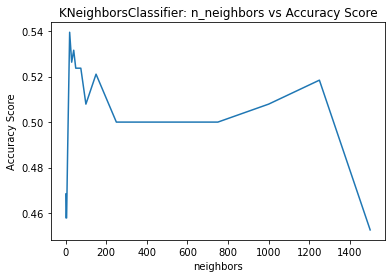

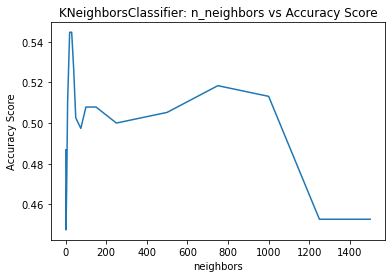

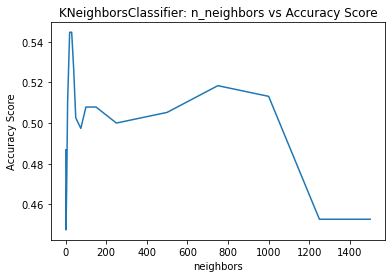

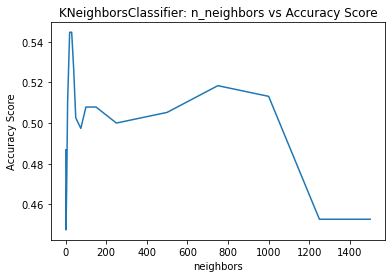

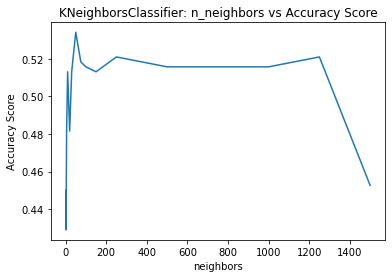

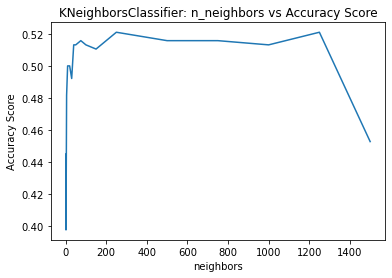

In [25]:
from sklearn.neighbors import KNeighborsClassifier

def knn_classification(X_train_classification,X_test_classification,Y_train_classification,Y_test_classification):

    n_neighbors = [1, 2, 5, 10, 20, 30, 40, 50, 75, 100, 150, 250, 500, 750, 1000, 1250, 1500] 
    knn_accuracy_scores = []
    for i in n_neighbors: # For each value in list
        knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_classification, Y_train_classification)
        # accuracy on X_test
        knn_accuracy = knn.score(X_test_classification, Y_test_classification)
        # creating a confusion matrix
        knn_accuracy_scores.append(knn_accuracy)
        knn_predictions = knn.predict(X_test_classification) 
        #print('KNeighborsClassifier, with',i,'neighbors :\n \naccuracy =', accuracy_score(Y_test_classification, knn_predictions))
        #print('\n',classification_report(Y_test_classification, knn_predictions, target_names=target_names)) 

    plt.figure()   
    plt.plot(n_neighbors, knn_accuracy_scores) 
    plt.ylabel('Accuracy Score') 
    plt.xlabel('neighbors') 
    plt.title('KNeighborsClassifier: n_neighbors vs Accuracy Score')

    return max(knn_accuracy_scores)

knn_scores = []

knn_virtual_data_1 = knn_classification(X_train_virtual_data_1,X_test_virtual_data_1,Y_train_virtual_data_1,Y_test_virtual_data_1)
knn_virtual_data_2 = knn_classification(X_train_virtual_data_2,X_test_virtual_data_2,Y_train_virtual_data_2,Y_test_virtual_data_2)

knn_scores.append(knn_virtual_data_1)
knn_scores.append(knn_virtual_data_2)

print('\nMax KNN Accuacy Scores for virtual_data_1:\n',knn_virtual_data_1)
print('\nMax KNN Accuacy Scores for virtual_data_2:\n',knn_virtual_data_2)

knn_mixed_data_1 = knn_classification(X_train_mixed_data_1,X_test_mixed_data_1,Y_train_mixed_data_1,Y_test_mixed_data_1)
knn_mixed_data_2 = knn_classification(X_train_mixed_data_2,X_test_mixed_data_2,Y_train_mixed_data_2,Y_test_mixed_data_2)

knn_scores.append(knn_mixed_data_1)
knn_scores.append(knn_mixed_data_2)

print('\nMax KNN Accuacy Scores for mixed_data_1:\n',knn_mixed_data_1)
print('\nMax KNN Accuacy Scores for mixed_data_2:\n',knn_mixed_data_2)

knn_real_data_1 = knn_classification(X_train_real_data_1,X_test_real_data_1,Y_train_real_data_1,Y_test_real_data_1)
knn_real_data_2 = knn_classification(X_train_real_data_2,X_test_real_data_2,Y_train_real_data_2,Y_test_real_data_2)

knn_scores.append(knn_real_data_1)
knn_scores.append(knn_real_data_2)

print('\nMax KNN Accuacy Scores for real_data_1:\n',knn_real_data_1)
print('\nMax KNN Accuacy Scores for real_data_2:\n',knn_real_data_2)



In [26]:
from sklearn.naive_bayes import GaussianNB

def GaussianNB_class(X_train_classification,X_test_classification,Y_train_classification,Y_test_classification):
    gnb = GaussianNB().fit(X_train_classification, Y_train_classification)
    # accuracy on X_test
    gnb_accuracy = gnb.score(X_test_classification, Y_test_classification)
    # creating a confusion matrix
    gnb_predictions = gnb.predict(X_test_classification) 
   # print(classification_report(Y_test_classification, gnb_predictions, target_names=target_names))
    #print('accuracy = ', accuracy_score(Y_test_classification, gnb_predictions))
    gs_NB_accuracy = accuracy_score(Y_test_classification, gnb_predictions)
    
    return gs_NB_accuracy

GaussianNB_score = []

GaussianNB_virtual_data_1 = GaussianNB_class(X_train_virtual_data_1,X_test_virtual_data_1,Y_train_virtual_data_1,Y_test_virtual_data_1)
GaussianNB_virtual_data_1 = GaussianNB_class(X_train_virtual_data_2,X_test_virtual_data_2,Y_train_virtual_data_2,Y_test_virtual_data_2)
    
GaussianNB_score.append(GaussianNB_virtual_data_1)
GaussianNB_score.append(GaussianNB_virtual_data_1)

print('\nMax GaussianNB Accuacy Scores for virtual_data_1:\n',GaussianNB_virtual_data_1)
print('\nMax GaussianNB Accuacy Scores for virtual_data_2:\n',GaussianNB_virtual_data_1)

GaussianNB_mixed_data_1 = GaussianNB_class(X_train_mixed_data_1,X_test_mixed_data_1,Y_train_mixed_data_1,Y_test_mixed_data_1)
GaussianNB_mixed_data_2 = GaussianNB_class(X_train_mixed_data_2,X_test_mixed_data_2,Y_train_mixed_data_2,Y_test_mixed_data_2)

GaussianNB_score.append(GaussianNB_mixed_data_1)
GaussianNB_score.append(GaussianNB_mixed_data_2)

print('\nMax GaussianNB Accuacy Scores for mixed_data_1:\n',GaussianNB_mixed_data_1)
print('\nMax GaussianNB Accuacy Scores for mixed_data_2:\n',GaussianNB_mixed_data_2)

GaussianNB_real_data_1 = GaussianNB_class(X_train_real_data_1,X_test_real_data_1,Y_train_real_data_1,Y_test_real_data_1)
GaussianNB_real_data_2 = GaussianNB_class(X_train_real_data_2,X_test_real_data_2,Y_train_real_data_2,Y_test_real_data_2)

GaussianNB_score.append(GaussianNB_real_data_1)
GaussianNB_score.append(GaussianNB_real_data_2)

print('\nMax GaussianNB Accuacy Scores for real_data_1:\n',GaussianNB_real_data_1)
print('\nMax GaussianNB Accuacy Scores for real_data_2:\n',GaussianNB_real_data_2)



Max GaussianNB Accuacy Scores for virtual_data_1:
 0.5026315789473684

Max GaussianNB Accuacy Scores for virtual_data_2:
 0.5026315789473684

Max GaussianNB Accuacy Scores for mixed_data_1:
 0.5131578947368421

Max GaussianNB Accuacy Scores for mixed_data_2:
 0.5131578947368421

Max GaussianNB Accuacy Scores for real_data_1:
 0.4710526315789474

Max GaussianNB Accuacy Scores for real_data_2:
 0.48157894736842105


In [29]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
def optimise_guassianNB(X_train, X_test, Y_train,Y_test):
    
    nb_classifier = GaussianNB()
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
    gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=cv,   
                 verbose=1, 
                 scoring='accuracy') 
    gs_NB.fit(X_train, Y_train)
    gs_NB_predictions = gs_NB.predict(X_test)
    gs_NB_accuracy=accuracy_score(Y_test, gs_NB_predictions) 


    gs_NB.best_params_
    gnb = gs_NB.best_score_
    return gs_NB_accuracy
    
optimise_guassianNB_real_data_1 = optimise_guassianNB(X_train_real_data_1,X_test_real_data_1,Y_train_real_data_1,Y_test_real_data_1)
optimise_guassianNB_real_data_2 = optimise_guassianNB(X_train_real_data_2,X_test_real_data_2,Y_train_real_data_2,Y_test_real_data_2)
optimise_guassianNB_mixed_data_1 = optimise_guassianNB(X_train_mixed_data_1,X_test_mixed_data_1,Y_train_mixed_data_1,Y_test_mixed_data_1)
optimise_guassianNB_mixed_data_2 = optimise_guassianNB(X_train_mixed_data_2,X_test_mixed_data_2,Y_train_mixed_data_2,Y_test_mixed_data_2)
optimise_guassianNB_virtual_data_1 = optimise_guassianNB(X_train_virtual_data_1,X_test_virtual_data_1,Y_train_virtual_data_1,Y_test_virtual_data_1)
optimise_guassianNB_virtual_data_2 = optimise_guassianNB(X_train_virtual_data_2,X_test_virtual_data_2,Y_train_virtual_data_2,Y_test_virtual_data_2)

print('best guassianNB based of best parameters for real_data_1:' ,optimise_guassianNB_real_data_1)
print('best guassianNB based of best parameters for real_data_2:' ,optimise_guassianNB_real_data_2)

print('best guassianNB based of best parameters for mixed_data_1:' ,optimise_guassianNB_mixed_data_1)
print('best guassianNB based of best parameters for mixed_data_2:' ,optimise_guassianNB_mixed_data_2)

print('best guassianNB based of best parameters for virtual_data_1:' ,optimise_guassianNB_virtual_data_1)
print('best guassianNB based of best parameters for virtual_data_2:' ,optimise_guassianNB_virtual_data_2)

Fitting 30 folds for each of 100 candidates, totalling 3000 fits
Fitting 30 folds for each of 100 candidates, totalling 3000 fits
best guassianNB based of best parameters for real_data_1: 0.5184210526315789
best guassianNB based of best parameters for real_data_2: 0.5184210526315789
best guassianNB based of best parameters for mixed_data_1: 0.5131578947368421
best guassianNB based of best parameters for mixed_data_2: 0.5131578947368421
best guassianNB based of best parameters for virtual_data_1: 0.4789473684210526
best guassianNB based of best parameters for virtual_data_2: 0.5026315789473684


In [32]:
# random search logistic regression
# takes a while to run for all the data combinations. 
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
# load dataset
# define model
#model = RandomForestClassifier()

def logistic_regression_optimisation(X_train, X_test, Y_train,Y_test):
    
    model = LogisticRegression()
    # define evaluation
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # define search space
    space = dict()
    space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
    space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
    space['C'] = loguniform(1e-5, 100)
    # define search
    search = RandomizedSearchCV(model, space, n_iter=100, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
    # execute search
    result = search.fit(X_train, Y_train)
    # summarize result
   # print('Best Score: %s' % result.best_score_)
   # print('Best Hyperparameters: %s' % result.best_params_)
    #print('scores', result)
    
    clf_logistic_predictions = result.predict(X_test)
    clf_logistic_accuracy=accuracy_score(Y_test, clf_logistic_predictions) 
    accuracy = accuracy_score(Y_test, clf_logistic_predictions)
    #print('\n',classification_report(Y_test, clf_logistic_predictions, target_names=target_names)) 
    return accuracy

#optimise_logistic_real_data_1 = logistic_regression_optimisation(X_train_real_data_1,X_test_real_data_1,Y_train_real_data_1,Y_test_real_data_1)
#optimise_logistic_real_data_2 = logistic_regression_optimisation(X_train_real_data_2,X_test_real_data_2,Y_train_real_data_2,Y_test_real_data_2)
#optimise_logistic_mixed_data_1 = logistic_regression_optimisation(X_train_mixed_data_1,X_test_mixed_data_1,Y_train_mixed_data_1,Y_test_mixed_data_1)
#optimise_logistic_mixed_data_2 = logistic_regression_optimisation(X_train_mixed_data_2,X_test_mixed_data_2,Y_train_mixed_data_2,Y_test_mixed_data_2)
#optimise_logistic_virtual_data_1 = logistic_regression_optimisation(X_train_virtual_data_1,X_test_virtual_data_1,Y_train_virtual_data_1,Y_test_virtual_data_1)
optimise_logistic_virtual_data_2 = logistic_regression_optimisation(X_train_virtual_data_2,X_test_virtual_data_2,Y_train_virtual_data_2,Y_test_virtual_data_2)

#print('best logistic_regression based of best parameters for real_data_1:' ,optimise_logistic_real_data_1)
#print('best logistic_regression based of best parameters for real_data_2:' ,optimise_logistic_real_data_2)

#print('best logistic_regression based of best parameters for mixed_data_1:' ,optimise_logistic_mixed_data_1)
#print('best logistic_regression based of best parameters for mixed_data_2:' ,optimise_logistic_mixed_data_2)

#print('best logistic_regression based of best parameters for virtual_data_1:' ,optimise_logistic_virtual_data_1)
print('best logistic_regression based of best parameters for virtual_data_2:' ,optimise_logistic_virtual_data_2)

Best Score: 0.5378947368421053
Best Hyperparameters: {'C': 0.003131281159444946, 'penalty': 'l1', 'solver': 'liblinear'}
scores RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
                   estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11d310d60>,
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=1, scoring='accuracy')
best logistic_regression based of best parameters for virtual_data_2: 0.5052631578947369


In [35]:
from sklearn.model_selection import RandomizedSearchCV

def random_forest_regression_optimisation(X_train, X_test, Y_train,Y_test):

    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [1, 2, 5, 10, 20, 30, 40, 50, 100, 250, 500, 750, 1000, 2000]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 5, 10, 20, 30, 40, 50, 100, 250, 500, 750, 1000, 2000]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(X_train, Y_train)
    rf_random.best_params_
    
    #print('Best Score: %s' % rf_random.best_score_)
    #print('Best Hyperparameters: %s' % rf_random.best_params_)
    
    rf_random_predictions = rf_random.predict(X_test)
    accuracy = accuracy_score(Y_test, rf_random_predictions)
    
    return accuracy


#optimise_random_forest_real_data_1 = random_forest_regression_optimisation(X_train_real_data_1,X_test_real_data_1,Y_train_real_data_1,Y_test_real_data_1)
#optimise_random_forest_real_data_2 = random_forest_regression_optimisation(X_train_real_data_2,X_test_real_data_2,Y_train_real_data_2,Y_test_real_data_2)
#optimise_random_forest_mixed_data_1 = random_forest_regression_optimisation(X_train_mixed_data_1,X_test_mixed_data_1,Y_train_mixed_data_1,Y_test_mixed_data_1)
#optimise_random_forest_mixed_data_2 = random_forest_regression_optimisation(X_train_mixed_data_2,X_test_mixed_data_2,Y_train_mixed_data_2,Y_test_mixed_data_2)
#optimise_random_forest_virtual_data_1 = random_forest_regression_optimisation(X_train_virtual_data_1,X_test_virtual_data_1,Y_train_virtual_data_1,Y_test_virtual_data_1)
optimise_random_forest_virtual_data_2 = random_forest_regression_optimisation(X_train_virtual_data_2,X_test_virtual_data_2,Y_train_virtual_data_2,Y_test_virtual_data_2)

#print('best logistic_regression based of best parameters for real_data_1:' ,optimise_random_forest_real_data_1)
#print('best logistic_regression based of best parameters for real_data_2:' ,optimise_random_forest_real_data_2)

#print('best logistic_regression based of best parameters for mixed_data_1:' ,optimise_random_forest_mixed_data_1)
#print('best logistic_regression based of best parameters for mixed_data_2:' ,optimise_random_forest_mixed_data_2)

#print('best logistic_regression based of best parameters for virtual_data_1:' ,optimise_random_forest_virtual_data_1)
print('best random_forest based of best parameters for virtual_data_2:' ,optimise_random_forest_virtual_data_2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
best random_forest based of best parameters for virtual_data_2: 0.5078947368421053


In [36]:
def get_best_data(best_scores, label):
    
    index = best_scores.index(max(best_scores))
    scores = [i for i, x in enumerate(best_scores) if x == max(best_scores)]
    print(scores)

    print('The best dataset is -' + str(label))

    if index == 0:
        print('mixed_data_1')
    elif index == 1:
        print('mixed_data_2')
    elif index == 2:
        print('real_data_1')
    elif index == 3:
        print('real_data_2')
    elif index == 4:
        print('virtual_data_1')
    elif index == 5:
        print('virtual_data_2')
        
    return best_scores
        
    #print([i for i, x in enumerate(best_scores) if x == max(best_scores)])
    
get_best_data(ann_scores, ' For ANN')     
get_best_data(tree_scores, ' For Random Forest')       
get_best_data(svm_lin_scores, ' For SVM Linear')     
get_best_data(svm_poly_scores, ' For SVM Poly')       
get_best_data(svm_rbf_scores, ' For SVM RBF')       
get_best_data(knn_scores, ' For KNN')  
get_best_data(GaussianNB_score, ' For GaussianNB')  



[4]
The best dataset is - For ANN
virtual_data_1
[4]
The best dataset is - For Random Forest
virtual_data_1
[5]
The best dataset is - For SVM Linear
virtual_data_2
[5]
The best dataset is - For SVM Poly
virtual_data_2
[0, 1, 2, 3]
The best dataset is - For SVM RBF
mixed_data_1
[1, 2, 3]
The best dataset is - For KNN
mixed_data_2
[2, 3]
The best dataset is - For GaussianNB
real_data_1


[0.5026315789473684,
 0.5026315789473684,
 0.5131578947368421,
 0.5131578947368421,
 0.4710526315789474,
 0.48157894736842105]

In [ ]:
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
# cross validation on the whole dataset. 
def cross_validation_randomforest(X_classification, Y_classification):
    mean_score = []
    trees = [1, 5, 10, 20, 50, 100, 250, 500, 750, 1000] 
    for i in trees: # For each value in list
        rfclf = RandomForestClassifier(n_estimators=500,min_samples_leaf=i)
        #print('\nCross Validation Scores for Random Forest Classifier with',i ,'trees:')
        scores_rfc = cross_val_score((rfclf), X_classification, Y_classification, cv=5)
        #print(scores_rfc)
        #print('mean = ', np.mean(scores_rfc))
        mean_score.append(np.mean(scores_rfc))
        
    print('best score = ', max(mean_score))


print('\nCross Validation Accuacy Scores for mixed_data_1 Random Forest:')
cross_validation_randomforest(X_mixed_data_1, Y_mixed_data_1)
print('\nCross Validation Accuacy Scores for mixed_data_2 Random Forest:')
cross_validation_randomforest(X_mixed_data_2, Y_mixed_data_2)
print('\nCross Validation Accuacy Scores for virtual_data_1 Random Forest:')
cross_validation_randomforest(X_virtual_data_1, Y_virtual_data_1)
print('\nCross Validation Accuacy Scores for virtual_data_2 Random Forest:')
cross_validation_randomforest(X_virtual_data_2, Y_virtual_data_2)
print('\nCross Validation Accuacy Scores for real_data_1 Random Forest:')
cross_validation_randomforest(X_real_data_1, Y_real_data_1)
print('\nCross Validation Accuacy Scores for real_data_2 Random Forest:')
cross_validation_randomforest(X_real_data_2, Y_real_data_2)


In [ ]:
def cross_validation_knn(X_classification, Y_classification):
    mean_score = []
    n_neighbors = [1, 2, 5, 10, 20, 30, 40, 50, 75, 100, 150, 250, 500, 750, 1000, 1250, 1500] 
    for i in n_neighbors: # For each value in list
        knn = KNeighborsClassifier(n_neighbors = i)
        #print('\nCross Validation Scores for KNeighborsClassifier Classifier with',i ,'neighbors:')
        scores_knn = cross_val_score((knn), X_classification, Y_classification, cv=5)
        #print(scores_knn)
        #print('mean = ', np.mean(scores_knn))
        mean_score.append(np.mean(scores_knn))
        
    print('best score = ', max(mean_score))
    

print('\nCross Validation Accuacy Scores for mixed_data_1 KNN:')
cross_validation_knn(X_mixed_data_1, Y_mixed_data_1)
print('\nCross Validation Accuacy Scores for mixed_data_2 KNN:')
cross_validation_knn(X_mixed_data_2, Y_mixed_data_2)
print('\nCross Validation Accuacy Scores for virtual_data_1 KNN:')
cross_validation_knn(X_virtual_data_1, Y_virtual_data_1)
print('\nCross Validation Accuacy Scores for virtual_data_2 KNN:')
cross_validation_knn(X_virtual_data_2, Y_virtual_data_2)
print('\nCross Validation Accuacy Scores for real_data_1 KNN:')
cross_validation_knn(X_real_data_1, Y_real_data_1)
print('\nCross Validation Accuacy Scores for real_data_2 KNN:')
cross_validation_knn(X_real_data_2, Y_real_data_2)


In [ ]:
def cross_validation_ann(X_classification, Y_classification):
    mean_score = []
    epochs = [1,5,10, 20, 30, 40, 50, 100, 250, 500, 750, 1000, 2000, 5000, 10000] 
    for i in epochs: # For each value in list
        mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'logistic', max_iter=i)
        #print('\nCross Validation Scores for ann Classifier with',i ,'epochs:')
        scores_ann = cross_val_score((mlp), X_classification, Y_classification, cv=5)
        #print(scores_ann)
        #print('mean = ', np.mean(scores_ann))
        mean_score.append(np.mean(scores_ann))
        
    print('best score = ', max(mean_score))
    
print('\nCross Validation Accuacy Scores for mixed_data_1 ANN:')
cross_validation_ann(X_mixed_data_1, Y_mixed_data_1)
print('\nCross Validation Accuacy Scores for mixed_data_2 ANN:')
cross_validation_ann(X_mixed_data_2, Y_mixed_data_2)
print('\nCross Validation Accuacy Scores for virtual_data_1 ANN:')
cross_validation_ann(X_virtual_data_1, Y_virtual_data_1)
print('\nCross Validation Accuacy Scores for virtual_data_2 ANN:')
cross_validation_ann(X_virtual_data_2, Y_virtual_data_2)
print('\nCross Validation Accuacy Scores for real_data_1 ANN:')
cross_validation_ann(X_real_data_1, Y_real_data_1)
print('\nCross Validation Accuacy Scores for real_data_2 ANN:')
cross_validation_ann(X_real_data_2, Y_real_data_2)


In [ ]:
def cross_validation_svm(X_classification, Y_classification, kernel):
    mean_score = []
    iters = [1,5,10, 20, 30, 40, 50, 100, 250, 500, 750, 1000, 2000, 5000, 10000] 
    for i in iters: # For each value in list
        svm_model = SVC(kernel = kernel, max_iter=i)        
        #print('\nCross Validation Scores for svm Classifier with',i ,'iters:')
        scores_svm = cross_val_score((svm_model), X_classification, Y_classification, cv=5)
        #print(scores_svm)
        #print('mean = ', np.mean(scores_svm))
        mean_score.append(np.mean(scores_svm))
        
    print('best score = ', max(mean_score))

        
print('\nCross Validation Accuacy Scores for mixed_data_1 SVM Linear:')
cross_validation_svm(X_mixed_data_1, Y_mixed_data_1,'linear')
print('\nCross Validation Accuacy Scores for mixed_data_2 SVM Linear:')
cross_validation_svm(X_mixed_data_2, Y_mixed_data_2,'linear')
print('\nCross Validation Accuacy Scores for virtual_data_1 SVM Linear:')
cross_validation_svm(X_virtual_data_1, Y_virtual_data_1,'linear')
print('\nCross Validation Accuacy Scores for virtual_data_2 SVM Linear:')
cross_validation_svm(X_virtual_data_2, Y_virtual_data_2,'linear')
print('\nCross Validation Accuacy Scores for real_data_1 SVM Linear:')
cross_validation_svm(X_real_data_1, Y_real_data_1,'linear')
print('\nCross Validation Accuacy Scores for real_data_2 SVM Linear:')
cross_validation_svm(X_real_data_2, Y_real_data_2,'linear')

print('\nCross Validation Accuacy Scores for mixed_data_1 SVM Poly:')
cross_validation_svm(X_mixed_data_1, Y_mixed_data_1,'poly')
print('\nCross Validation Accuacy Scores for mixed_data_2 SVM Poly:')
cross_validation_svm(X_mixed_data_2, Y_mixed_data_2,'poly')
print('\nCross Validation Accuacy Scores for virtual_data_1 SVM Poly:')
cross_validation_svm(X_virtual_data_1, Y_virtual_data_1,'poly')
print('\nCross Validation Accuacy Scores for virtual_data_2 SVM Poly:')
cross_validation_svm(X_virtual_data_2, Y_virtual_data_2,'poly')
print('\nCross Validation Accuacy Scores for real_data_1 SVM Poly:')
cross_validation_svm(X_real_data_1, Y_real_data_1,'poly')
print('\nCross Validation Accuacy Scores for real_data_2 SVM Poly:')
cross_validation_svm(X_real_data_2, Y_real_data_2,'poly')

print('\nCross Validation Accuacy Scores for mixed_data_1 SVM RBF:')
cross_validation_svm(X_mixed_data_1, Y_mixed_data_1,'rbf')
print('\nCross Validation Accuacy Scores for mixed_data_2 SVM RBF:')
cross_validation_svm(X_mixed_data_2, Y_mixed_data_2,'rbf')
print('\nCross Validation Accuacy Scores for virtual_data_1 SVM RBF:')
cross_validation_svm(X_virtual_data_1, Y_virtual_data_1,'rbf')
print('\nCross Validation Accuacy Scores for virtual_data_2 SVM RBF:')
cross_validation_svm(X_virtual_data_2, Y_virtual_data_2,'rbf')
print('\nCross Validation Accuacy Scores for real_data_1 SVM RBF:')
cross_validation_svm(X_real_data_1, Y_real_data_1,'rbf')
print('\nCross Validation Accuacy Scores for real_data_2 SVM RBF:')
cross_validation_svm(X_real_data_2, Y_real_data_2,'rbf')

In [13]:
knn = KNeighborsClassifier(n_neighbors = 30).fit(X_train_virtual_data_2, Y_train_virtual_data_2)
knn_accuracy = knn.score(X_test_virtual_data_2, Y_test_virtual_data_2)
knn_predictions = knn.predict(X_test_virtual_data_2) 
predictions = pd.DataFrame(knn_predictions)
predictions

predictions['Home Team'] = home_team_name_class
predictions['Away Team'] = away_team_name_class
predictions['Home Team Points'] = knn_predictions
predictions['Away Team Points'] = knn_predictions

predictions.columns = ['Prediction','Home Team','Away Team','Home Team Points','Away Team Points']
predictions

real_results = pd.DataFrame(Y_test_virtual_data_2)
real_results['Home Team'] = home_team_name_class
real_results['Away Team'] = away_team_name_class
real_results['Home Team Points'] = Y_test_virtual_data_2
real_results['Away Team Points'] = Y_test_virtual_data_2

real_results.columns = ['Result','Home Team','Away Team','Home Team Points','Away Team Points']
real_results


,Result,Home Team,Away Team,Home Team Points,Away Team Points
0,2,Liverpool,Norwich,2,2
1,0,West Ham,Man City,0,0
2,1,Bournemouth,Sheffield United,1,1
3,2,Burnley,Southampton,2,2
4,1,Crystal Palace,Everton,1,1
...,...,...,...,...,...
375,0,Leicester,Man United,0,0
376,2,Man City,Norwich,2,2
377,0,Newcastle,Liverpool,0,0
378,2,Southampton,Sheffield United,2,2


In [15]:
def add_points(data):
    

    squad_position = data.iloc[:,3].replace(to_replace=2, value=3, regex=False)
    data['Home Team Points'] = squad_position 
    
    squad_position = data.iloc[:,3].replace(to_replace=0, value=0, regex=False)
    data['Home Team Points'] = squad_position 
    
    squad_position = data.iloc[:,3].replace(to_replace=1, value=1, regex=False)
    data['Home Team Points'] = squad_position 
    
    squad_position = data.iloc[:,4].replace(to_replace=0, value=3, regex=False)
    data['Away Team Points'] = squad_position 
    
    squad_position = data.iloc[:,4].replace(to_replace=2, value=0, regex=False)
    data['Away Team Points'] = squad_position 
    
    squad_position = data.iloc[:,4].replace(to_replace=1, value=1, regex=False)
    data['Away Team Points'] = squad_position 
    
    return data

add_points(predictions)
add_points(real_results)

,Result,Home Team,Away Team,Home Team Points,Away Team Points
0,2,Liverpool,Norwich,3,0
1,0,West Ham,Man City,0,3
2,1,Bournemouth,Sheffield United,1,1
3,2,Burnley,Southampton,3,0
4,1,Crystal Palace,Everton,1,1
...,...,...,...,...,...
375,0,Leicester,Man United,0,3
376,2,Man City,Norwich,3,0
377,0,Newcastle,Liverpool,0,3
378,2,Southampton,Sheffield United,3,0


In [16]:
def get_points(football_results):
    
    # initialise arrays
    home_points = []
    away_points = []
    team_name = []
    cumlative_home_points = []
    cumlative_away_points = []
    
    # converts columns to numeric values 
    football_results["Home Team Points"] = pd.to_numeric(football_results["Home Team Points"])
    football_results["Away Team Points"] = pd.to_numeric(football_results["Away Team Points"])
    
    # get points for all teams at home
    for i, val in (football_results.groupby(football_results['Home Team'])['Home Team Points']).sum().iteritems():
        home_points.append(val)
        home_points = home_points

    # get points for all teams away from home
    for i, val in (football_results.groupby(football_results['Away Team'])['Away Team Points']).sum().iteritems():
        team_name.append(i)
        team_name = team_name
        away_points.append(val)
        away_points = away_points
     
    # add home points and away points together 
    total_points = []
    for i in range(0, len(away_points)):
        total_points.append(home_points[i] + away_points[i])
    
    # convert to a dataframe
    total_points = pd.DataFrame(total_points)
    team_name = pd.DataFrame(team_name)
    # add points and teams together 
    table = pd.concat([team_name.reset_index(drop=True),total_points.reset_index(drop=True)], axis=1)
    table.columns = ['Club', 'Points']
    table = table.sort_values(['Points'],ascending=False)
    
        # keeps a cumlative total of teams home points 
    for i, val in (football_results.groupby(football_results['Home Team'])['Home Team Points']).cumsum().iteritems():
        cumlative_home_points.append(val)
        cumlative_home_points = cumlative_home_points

        # keeps a cumlative total of teams away points 
    for i, val in (football_results.groupby(football_results['Away Team'])['Away Team Points']).cumsum().iteritems():
        cumlative_away_points.append(val)
        cumlative_away_points = cumlative_away_points
     
    football_results['total_home_points'] = cumlative_home_points
    football_results['total_away_points'] = cumlative_away_points
    
    return table

predicted_table = get_points(predictions)
real_table = get_points(real_results)

compare_tables = pd.merge(predicted_table, real_table, left_on='Club', right_on='Club', how='left').drop([], axis=1)

compare_tables.columns = ['Club','Predicted Points','Actual Points']
compare_tables

,Club,Predicted Points,Actual Points
0,Man City,105,81
1,Tottenham,99,59
2,Liverpool,99,99
3,Man United,96,66
4,Chelsea,93,66
5,Arsenal,90,56
6,Burnley,59,54
7,Everton,56,49
8,Brighton,56,41
9,Crystal Palace,54,43
